## Recap Matrix Multiplication
Produces a matrix from two matrices

<img src="pics/mmult.png">
The number of columns in the first matrix (m) must be equal to the number of rows in the second matrix. The result matrix has the number of rows of the first (l) and the number of columns of the second matrix (n).  


If $\mathbf{A}$ is an $m \times n$ matrix and $\mathbf{B}$ is an $n \times p$ matrix
$$
\mathbf{A}=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1n} \\
 a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{pmatrix},\quad\mathbf{B}=\begin{pmatrix}
 b_{11} & b_{12} & \cdots & b_{1p} \\
 b_{21} & b_{22} & \cdots & b_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{n1} & b_{n2} & \cdots & b_{np} \\
\end{pmatrix}
$$

the matrix product $\mathbf{C} = \mathbf{AB}$ is defined to be the $m \times p$

$\mathbf{C}=\begin{pmatrix}
 c_{11} & c_{12} & \cdots & c_{1p} \\
 c_{21} & c_{22} & \cdots & c_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
 c_{m1} & c_{m2} & \cdots & c_{mp} \\
\end{pmatrix}$

such that 
$$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} +\cdots + a_{in}b_{nj}= \sum_{k=1}^n a_{ik}b_{kj} \;\;\; \text{for}\ i = 1, ..., m\ \text{and}\ j = 1, ..., p.$$

<img src="pics/mmultillust.png">

The corresponding operation on vectors is referred to as dot product or scalar product. If two vectors $\mathbf{\color{red}a} = \left[\color{red}a_\color{red}1, \color{red}a_\color{red}2, ..., \color{red}a_\color{red}n\right]$ and $\mathbf{\color{blue}b} = \left[\color{blue}b_\color{blue}1, \color{blue}b_\color{blue}2, ..., \color{blue}b_\color{blue}n\right]$

are identified as row matrices:

$$\begin{align}
\mathbf{\color{red}a} \cdot \mathbf{\color{blue}b} &= \mathbf{\color{red}a}\mathbf{\color{blue}b}^\top\\
&=\sum_{i=1}^n {\color{red}a}_i{\color{blue}b}_i\\
&={\color{red}a}_1{\color{blue}b}_1+{\color{red}a}_2{\color{blue}b}_2+\cdots+{\color{red}a}_n{\color{blue}b}_n \\
\end{align}$$

Source: https://en.wikipedia.org/wiki/Matrix_multiplication and https://en.wikipedia.org/wiki/Dot_product

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
# from mpl_toolkits.mplot3d import Axes3D
import math
import pandas as pd

# Logistic Regression
Binary Logistic Regression: A classification model that can separate the data into two classes 0/1.


# The Perceptron
<img src="pics/perc.png">

The neural unit froms a linear combination of the input $x$: $z=w\cdot x+b$, which is passed into a non-linear activation function, e.g. the sigmoid: $\sigma(z)=\frac{1}{1+\exp^{-z}}$

Therefore, the logistic regression model looks like:
$$f_{\mathbf{w},b}(x) = \frac{1}{1+\exp^{-(\mathbf{w}\cdot x+b)}}$$

By looking at the graph of the sigmoid function you can see how well it fits the purpose in classification. It squashes $z$ onto the the domain (0,1). If we weights $\mathbf{w}$ and $b$ are optimised appropriately, we can interpret the output of $f(\mathbf{x})$ as the probability of $y_i$ being positive. For example, if it's higher than or equal to the threshold 0.5 we could say that the class of $x$ is positive; otherwise it is negative.

In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

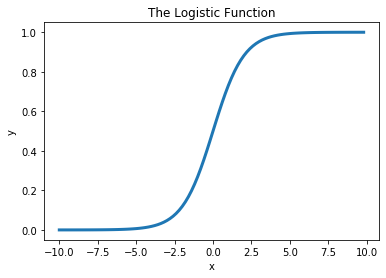

In [3]:
x = np.arange(-10., 10., 0.2)
y = list(map(sigmoid, x))
plt.title('The Logistic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y, linewidth=3)

## The Data
We construct a synthetic data set for which a closed form solution of the logistic regression model exists
* binary
* the data follows a multivariate Gaussian distribution
* same variance and off-diagonal elements of the covariance matrix are zero

Recap: Normal distribution of one random variable $x$ with standard deviation $\sigma$ (variance $\sigma^2$) and mean $\mu$: 
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

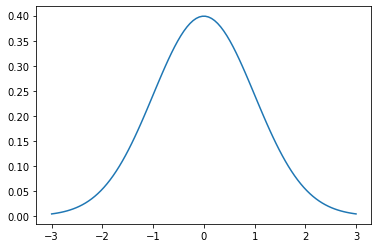

In [4]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x, stats.norm.pdf(x, mu, sigma))

The multivariate Gaussian distribution is a generalization of the one-dimensional (univariate) normal distribution. pdf:
$$p(\mathbf{X})=\frac{1}{\sqrt{\left(2\pi\right)^k|\mathbf{\Sigma}|}}\exp^{-\frac{1}{2}\left(\mathbf{X}-\mathbf{\mu}\right)^T\mathbf{\Sigma}^{-1}\left(\mathbf{X}-\mathbf{\mu}\right)}$$

with a $k$-dimensional random vector $\mathbf{X} = (X_1,\ldots,X_k)^{\mathrm T}$

the $k$-dimensional mean vector:
$$ \boldsymbol\mu = \operatorname{E}[\mathbf{X}] = ( \operatorname{E}[X_1], \operatorname{E}[X_2], \ldots, \operatorname{E}[X_k] )$$
and the $k \times k$ covariance matrix
$$\Sigma_{i,j} = \operatorname{E} [(X_i - \mu_i)( X_j - \mu_j)] = \operatorname{Cov}[X_i, X_j]$$

such that $1 \le i,j \le k.$ The inverse of the covariance matrix $\boldsymbol\Sigma^{-1}$ is called.

For your input data we now construct a multivariate normal distribution from two marginal distributions: One Gaussian centered at -2, -2, the other centered at 2,2. Both have the same covariance:

$N$: total number of samples/data points  
$D$: number of features

In [5]:
N = 100 # number of samples
D = 2 # number of features

In [6]:
# X = np.random.randn(N,D)
# X[:50, :] = X[:50,:] - 2*np.ones((50,D))
# X[50:, :] = X[50:, :] + 2*np.ones((50,D))

N_0 = int(N/2) # number of samples for class 0
N_1 = int(N/2) # number of samples for class 1

mu_0 = [-2,-2]
variance = 1

mu_1 = [2,2]

m_cov = [[variance, 0],
         [0, variance]]

In [7]:
np.random.seed(41) # make the results reproducible
X = np.concatenate([np.random.multivariate_normal(mu_0, m_cov, N_0),
                    np.random.multivariate_normal(mu_1, m_cov, N_1)],
                   axis=0)
X.shape

(100, 2)

The target labels:

In [8]:
T = np.array([0]*N_0 + [1]*N_1)

In [9]:
df = pd.DataFrame(X, columns=['x', 'y',])
df['class'] = T

In [11]:
from lreg_helpers import multivariateGrid

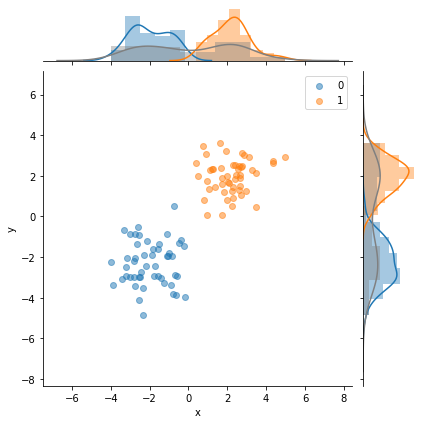

In [12]:
multivariateGrid('x', 'y', 'class', df=df)

## Implementation of the Feed-Forward Pass
$\mathbf{Y}_{N\times 1}=\sigma\left(\mathbf{X}_{N\times D}\cdot \mathbf{W}_{D\times 1}+b_{N\times 1}\right)$ with the sigmoid applied element-wise

equivalent to incorporating $b$ in the weights and adding a columns of ones to $\mathbf{X}$: 
$\mathbf{Y}_{N\times 1}=\sigma\left(\left[\overline{1}, \mathbf{X}\right]_{N\times D+1}\cdot \left[b,w_1,...,w_D\right]_{D+1\times 1}\right)$

In [13]:
ones = np.array([[1]*N]).T
ones.shape

(100, 1)

In [14]:
Xb = np.concatenate((ones, X), axis=1)
Xb.shape

(100, 3)

Initialise the weights vector randomly from a normal distribution

In [15]:
W = np.random.randn(D + 1) # the first element is the bias term b

Calculate the dot product between each row of X with the weights vector:

In [17]:
Z = Xb.dot(W)
Z.shape

(100,)

Apply sigmoid to each element in $\mathbf{Z}$

In [18]:
Y = sigmoid(Z)
Y.shape

(100,)

We get an $N$ dimensional output vector, each value between 0 and 1

In [19]:
Y

array([0.07857417, 0.13416845, 0.16394872, 0.07200735, 0.05607329,
       0.08414536, 0.0598706 , 0.03847981, 0.046371  , 0.18841081,
       0.04184845, 0.10942109, 0.26489916, 0.12220989, 0.23382576,
       0.16089043, 0.05494789, 0.23304133, 0.10875319, 0.07219884,
       0.0993317 , 0.08565297, 0.15930237, 0.19434353, 0.06516812,
       0.15051165, 0.09518452, 0.11129435, 0.08463558, 0.02894559,
       0.35553072, 0.28862635, 0.05029387, 0.24876496, 0.12222981,
       0.18098627, 0.11079519, 0.1553117 , 0.14579836, 0.04663735,
       0.11208699, 0.09478097, 0.03039886, 0.05188205, 0.088893  ,
       0.22461426, 0.0528192 , 0.0456811 , 0.18944049, 0.06106788,
       0.13448393, 0.28535174, 0.22265529, 0.37425162, 0.3918355 ,
       0.42537114, 0.45725173, 0.36663913, 0.31244761, 0.30350377,
       0.21381565, 0.16477995, 0.43272193, 0.37707742, 0.67822103,
       0.46198705, 0.2133897 , 0.53316562, 0.3606359 , 0.40693073,
       0.66913562, 0.41950465, 0.42598303, 0.41754496, 0.40905

## The Loss Function
The optimization criterion in logistic regression is called maximum likelihood. We maximise the likelihood of the observations in the training set according to the model.

Consider a ($D$-dimensional) training example $\mathbf{x}_{n}$ and the corresponding target value $t_{n}$ (binary: 0 or 1). Applying the logistic regression model to $\mathbf{x}_{n}$ 

$$y_n = f_{\mathbf{w},b}(\mathbf{x}_n)$$

yields a value $0<y_n<1$. If $t_n$ is 1, the likelihood of $t_n$ being the positive class, according to our model, is given by $y_n$. Similarly, if $t_n$ is 0, the likelihood of it being the class 0 is given by $1-y_n$.

the likelihood of the training data according to our model
$$L_{\mathbf{w}, b} \stackrel{\text{def}}{=} \prod_{n=1}^N y_n^{t_n}(1-y_n)^{1-t_n}$$
$y_n$ when $t_n=1$ and $1-y_n$ otherwise.

The log-likelihood is more practical (e.g. numerical underflow and we can consider contributions from all samples $N$, even if we predict 1 for $t_n=0$ and 0 for $t_n=1$ for some):

$$\log L_{\mathbf{w},b} \stackrel{\text{def}}{=} \ln \left(L_{\mathbf{w},b}\left(\mathbf{x}_n\right)\right)=\sum_{n=1}^N \left[t_n \ln y_n +(1-t_n) \ln(1-y_n) \right]$$

if $t_n=1$ only first term matters, if $t_n=0$ only second term matters

$\ln y \rightarrow$ number between $0$ and $-\inf$

* $t_n=1,\; y_n=1 \; \rightarrow \; 0$
* $t_n=0,\; y_n=0 \; \rightarrow \; 0$
* $t_n=1\; y_n=0.9 \; \text{(very close)} \; \rightarrow \; 0.11$
* $t_n=1,\; y_n=0.5 \; \text{(right on the decision boundary)} \; \rightarrow \; 0.69$
* $t_n=1,\; y_n=0.1 \; \text{(very wrong)} \; \rightarrow \; 2.3$

Correspondingly, we can also minimise the negative of the log-likelihood, which is called the log-likelihood error or cross-entropy error.

$$J \stackrel{\text{def}}{=} - \sum_{n=1}^N \left[t_n \ln y_n +(1-t_n) \ln(1-y_n) \right]$$

In [24]:
def cross_entropy(T, Y):
    E = 0
    for n in range(N): # sum over all the samples
        if T[n] == 1:
            E -= np.log(Y[n])
        else:
            E -= np.log(1 - Y[n])
    return E

Calculate the cross-entropy error of the outputs that were generated above with the randomly chosen weights:

In [25]:
cross_entropy(T,Y)

57.835657891702766

# The Closed Form Solution
Logistic gregression is about finding the hyperplance that separates the (in this case 2) groups. If the data is Gaussian distributed with equal covariance we can use Bayes' method to find an analytical solution for the optimal weights.

Bayes' Theorem:
$$$$

In [22]:
w_cf = np.array([0, 4, 4])

plot the closed-form solution!

Calculate the cross entropy error of the outputs generated with the weights according to the closed-form solution:

In [23]:
Y_cf = sigmoid(Xb.dot(w_cf))
cross_entropy(T, Y_cf)

0.3439512090041786

And compare with the result above from the randomly chosen weights!

# Gradient Descent
Optimise the weights numerically and see how close we get to the closed-form solution.

$$J \stackrel{\text{def}}{=} - \sum_{n=1}^N \left[t_n \ln y_n +(1-t_n) \ln(1-y_n) \right]$$

Use the chain rule to calculate the partial derivative of the cross entropy loss with respect to the individual weights $w_i$:

$$\frac{\partial J}{\partial w_i} = \sum_{n=1}^N \frac{\partial J}{\partial y_n} \frac{\partial y_n}{\partial z_n} \frac{\partial z_n}{\partial w_i}$$

$$\frac{\partial J}{\partial y_n} = - t_n \frac{1}{y_n} - (1-t_n) \frac{1}{1-y_n} (-1)$$

remainder: $y_n = \frac{1}{1+\exp^{-\mathbf{z_n}}}$

$$\begin{aligned}
\frac{\partial y_n}{\partial z_n} &= \frac{-1}{(1+\exp^{-\mathbf{z_n}})^2}(\exp^{-z})(-1)\\
&= y_n \frac{\exp^{-z}}{1+\exp^{-z}}\\
&= y_n \frac{1+\exp^{-z}-1}{1+\exp^{-z}}\\
&= y_n \left( \frac{1+\exp^{-z}}{1+\exp^{-z}} - \frac{1}{1+\exp^{-z}} \right)\\
&= y_n (1-y_n)\\
\end{aligned}$$

remainder: $z_n = w_0 x_{n,0} + w_1 x_{n,1} + w_2 x_{n,2} + ...$

$$\frac{\partial z_n}{\partial w_i}= x_{n,i}$$

Putting it all together:

$$\begin{aligned}
\frac{\partial J}{\partial w_i} &= -\sum_{n=1}^N t_n \frac{1}{y_n} y_n (1-y_n) x_{n,i} - (1-t_n) \frac{1}{1-y_n} y_n (1-y_n) x_{n,i}\\
&= -\sum_{n=1}^N t_n (1-y_n) x_{n,i} - (1-t_n) y_n x_{n,i}\\
&= \sum_{n=1}^N (y_n - t_n) x_{n,i}\\
\end{aligned}$$

This can be expressed in vector form:

$$\begin{aligned}
\frac{\partial J}{\partial \mathbf{W}} &= \sum_{n=1}^N (y_n - t_n) \mathbf{X}_{n}\\
&= \mathbf{X}^T \left(\mathbf{Y}-\mathbf{T}\right) \; \rightarrow \text{shape} D\times 1
\end{aligned}$$

Now we can iteratively
1. calculate the gradient with respect to the weights
2. change the weights by a small factor (the learning rate) along their **negative** gradient (minimise $J$)
3. recalculate $J$ with the updated weights
4. repeat for a fixed number of steps or the weights are considered *converged*

In [26]:
learning_rate = 0.1
N_steps = 100

In [29]:
for i in range(N_steps):
    if i % 5 == 0:
        print(cross_entropy(T, Y))
    W += learning_rate * np.dot((T - Y).T, Xb) # follow the negative gradient!
    Y = sigmoid(Xb.dot(W)) # Calculate the new output based on the updated weights

print(' '.join(['Final weights:', str(W)]))

0.05212387519009031
0.04987660820147317
0.047812029293291085
0.04590902693812754
0.044149590274301195
0.04251826438860999
0.04100171580498902
0.039588383156242656
0.03826819427433941
0.037032335493072915
0.03587306231124986
0.03478354305690493
0.03375772906189957
0.032790246269473924
0.03187630427489037
0.031011619627008213
0.030192350859237035
0.029415043217382114
0.02867658144330628
0.027974149282169646
Final weights: [-0.44659224  8.71356798  6.66551284]


low error, but weights far away from closed-form solution! This is due to the choice of the objective function. Regularisation will improve on this... More data